<div style="direction:rtl; text-align:right">

# المشروع الخامس

<div style="direction:rtl; text-align:right">
أهلاً بكم في المشروع الخامس من علم البيانات. في هذا المشروع، سنعمل معاً على التعرف على المؤثرين في الشبكات الاجتماعية باستخدام بيانات من موقع تويتر باستخدام العديد من السمات. ندعوك لقراءة تفاصيل المسابقة في كاقل:

- https://www.kaggle.com/c/predict-who-is-more-influential-in-a-social-network/data

<div style="direction:rtl; text-align:right">
ملاحظة: عليك تعديل الخانات التي يوجد فيها الكود أدناه قبل تسليم المشروع. جميع الخانات الأخرى يجب ان تبقى كما هي بدون أي 
تعديل.

```
############################
# عليك تعديل هذه الخانة قبل تسليم المشروع
# YOU HAVE TO EDIT THIS CELLL
############################
```

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<div style="direction:rtl; text-align:right">
الهدف من هذا المشروع هو توقع المؤثرين في الشبكات الاجتماعية. البيانات الحالية مكونة من 5500 صف و 23 عمود. كل صف يحتوي على معلومات مستخدمين اثنين (11 متغير لكل منهم) بالإضافة إلى متغير الاستجابة والذي يحتوي على المستخدم الأكثر تأثيراً بين الاثنين (1 يعني أن A هو الأكثر تأثيراً بينما 0 يعني أن B هو الأكثر تأثيراً.

<div style="direction:rtl; text-align:right">

# قراءة البيانات

In [128]:
train_data = pd.read_csv('predict-who-is-more-influential-in-a-social-network/train.csv')

In [129]:
train_data.columns

Index(['Choice', 'A_follower_count', 'A_following_count', 'A_listed_count',
       'A_mentions_received', 'A_retweets_received', 'A_mentions_sent',
       'A_retweets_sent', 'A_posts', 'A_network_feature_1',
       'A_network_feature_2', 'A_network_feature_3', 'B_follower_count',
       'B_following_count', 'B_listed_count', 'B_mentions_received',
       'B_retweets_received', 'B_mentions_sent', 'B_retweets_sent', 'B_posts',
       'B_network_feature_1', 'B_network_feature_2', 'B_network_feature_3'],
      dtype='object')

In [130]:
y = train_data['Choice']

In [131]:
train_data.drop(columns='Choice', inplace=True)

<div style="direction:rtl; text-align:right">
لنرى أولاً توزيع متغير الاستجابة:

In [132]:
print('Frequencies of each label in the dataset: ')
y.value_counts(normalize=True)

Frequencies of each label in the dataset: 


1    0.509455
0    0.490545
Name: Choice, dtype: float64

<div style="direction:rtl; text-align:right">
يوضح التوزيع أعلاه أن لدينا توازن بين الأصناف بحيث نستطيع المضي قدماً دون الاكتراث لهذا الأمر لاحقاً.

<div style="direction:rtl; text-align:right">
لنلق الآن نظرة على أنواع المتغيرات لنتأكد أن جميع المتغيرات مقروءة بشكل سليم:

In [133]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5500 entries, 0 to 5499
Data columns (total 22 columns):
A_follower_count       5500 non-null int64
A_following_count      5500 non-null int64
A_listed_count         5500 non-null int64
A_mentions_received    5500 non-null float64
A_retweets_received    5500 non-null float64
A_mentions_sent        5500 non-null float64
A_retweets_sent        5500 non-null float64
A_posts                5500 non-null float64
A_network_feature_1    5500 non-null int64
A_network_feature_2    5500 non-null float64
A_network_feature_3    5500 non-null float64
B_follower_count       5500 non-null int64
B_following_count      5500 non-null int64
B_listed_count         5500 non-null int64
B_mentions_received    5500 non-null float64
B_retweets_received    5500 non-null float64
B_mentions_sent        5500 non-null float64
B_retweets_sent        5500 non-null float64
B_posts                5500 non-null float64
B_network_feature_1    5500 non-null int64
B_network

<div style="direction:rtl; text-align:right">
لنبدأ باستعراض ملخص للبيانات باستخدام describe:

In [134]:
train_data.describe().round(decimals=2)

,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,A_network_feature_2,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
count,5500.00,5500.00,5500.00,5500.00,5500.00,5500.00,5500.00,5500.00,5500.00,5500.00,...,5500.00,5500.00,5500.00,5500.00,5500.00,5500.00,5500.00,5500.00,5500.00,5500.00
mean,649883.95,12658.95,5952.45,2666.03,1032.37,6.01,1.11,9.09,5267.77,84.81,...,12738.26,5903.15,2554.60,997.15,6.10,1.11,9.51,5254.93,85.02,3745.18
std,2028787.44,49008.67,17339.14,29165.43,10954.95,9.52,1.91,18.31,28946.78,104.07,...,50054.52,16298.46,25088.73,9342.01,9.73,1.94,19.42,26778.82,106.69,5518.40
min,16.00,0.00,0.00,0.10,0.10,0.10,0.10,0.10,0.00,0.00,...,0.00,0.00,0.10,0.10,0.10,0.10,0.10,0.00,0.00,0.00
25%,2663.75,322.00,85.00,3.45,0.72,0.36,0.10,0.63,12.00,14.99,...,322.00,75.00,3.26,0.71,0.36,0.10,0.82,11.00,15.18,1206.50
50%,45589.00,778.00,932.00,48.77,14.03,2.30,0.34,3.56,195.00,54.93,...,773.00,890.00,48.77,14.03,2.25,0.34,3.34,190.00,54.93,2206.42
75%,392738.00,2838.00,6734.00,349.82,118.70,7.20,1.32,10.69,1323.00,109.70,...,2838.00,6734.00,374.37,107.08,6.87,1.32,10.60,1323.00,112.19,4349.91
max,36543194.00,1165830.00,549144.00,1145218.99,435825.87,76.81,16.29,193.07,920838.00,1121.00,...,664324.00,549144.00,1145218.99,435825.87,76.81,16.29,193.07,920838.00,1861.58,75526.08


<div style="direction:rtl; text-align:right">
من خلال تفحص قيم الانحراف المعياري (std)، نجد أن أغلب المتغيرات لديها قيم عالية جداً بما يعكس توزيعاً عريضاً للبيانات، وهذا لا يساعدنا بشكل كبير. سنقوم بتجهيز البيانات وإنشاء بعض المتغيرات الجديدة.

<div style="direction:rtl; text-align:right">

# تجهيز البيانات

<div style="direction:rtl; text-align:right">
الهدف من تجهيز البيانات هو تنظيف البيانات والتحقق منها بالإضافة إلى إضافة أي متغيرات جديدة قد تكون مهمة في عملية التصنيف. سنبدأ أولاً بالتأكد من عدم وجود أي بيانات مفقودة، وملئها بالطريقة المناسبة إن وجدت:

In [135]:
############################
# عليك تعديل هذه الخانة قبل تسليم المشروع
# YOU HAVE TO EDIT THIS CELLL
############################

train_data.isnull().sum()

A_follower_count       0
A_following_count      0
A_listed_count         0
A_mentions_received    0
A_retweets_received    0
A_mentions_sent        0
A_retweets_sent        0
A_posts                0
A_network_feature_1    0
A_network_feature_2    0
A_network_feature_3    0
B_follower_count       0
B_following_count      0
B_listed_count         0
B_mentions_received    0
B_retweets_received    0
B_mentions_sent        0
B_retweets_sent        0
B_posts                0
B_network_feature_1    0
B_network_feature_2    0
B_network_feature_3    0
dtype: int64

<div style="direction:rtl; text-align:right">
كيف يمكن أن ننشيء أعمدة جديدة؟ سنقوم بإنشاء أعمدة جديدة تعبر عن الفرق في القيم بين المستخدم A والمستخدم B. فمثلا، بالإضافة إلى A_follower_count و B_follower_count، نستطيع إيجاد الفرق بين المتغيرين وإنشاء متغير ثالث يعبر عن الفرق. سأترك المهمة لك:

In [136]:
############################
# عليك تعديل هذه الخانة قبل تسليم المشروع
# YOU HAVE TO EDIT THIS CELLL
############################

# in this new function, we will perform the following operations and make a new
# dataframe only for the new variables

# A_follower_count - B_follower_count
# A_following_count - B_following_count
# A_listed_count - B_listed_count
# A_mentions_received - B_mentions_received
# A_retweets_received - B_retweets_received
# A_mentions_sent - B_mentions_sent
# A_retweets_sent - B_retweets_sent
# A_posts - B_posts
# A_network_feature_1 - B_network_feature_1
# A_network_feature_2 - B_network_feature_2
# A_network_feature_3 - B_network_feature_3

def get_substracted_features(df):
    
    cols =['follower_count', 'following_count', 'listed_count', 'mentions_received',
          'retweets_received', 'mentions_sent', 'retweets_sent', 'posts', 'network_feature_1', 
           'network_feature_2',
          'network_feature_3']
    combined = df
    
    for col in cols:
        combined['s_'+col] = combined['A_'+col] - combined['B_'+col]
    
    return combined

<div style="direction:rtl; text-align:right">
إضافة إلى متغيرات الفرق، نستطيع كذلك استخدام متغيرات جديدة عبارة عن متغيرات النسبة. فمثلا، نستطيع حساب نسبة متابعي مستخدم ما إلى من يتابعهم، وذلك مثلاً بقسمة A_follower_count على A_following_count وهكذا. لنقم بكتابة الأمر في الخانة أدناه:

In [137]:
############################
# عليك تعديل هذه الخانة قبل تسليم المشروع
# YOU HAVE TO EDIT THIS CELLL
############################

# in this new function, we will perform the following operations and make a new
# dataframe only for the new variables

# A_follower_count / A_following_count
# B_follower_count / B_following_count
# A_mentions_received / A_mentions_sent
# A_retweets_received / A_retweets_sent
# B_mentions_received / B_mentions_sent
# B_retweets_received / B_retweets_sent
# A_posts / A_listed_count
# B_posts / B_listed_count

def get_ratio_features(df):
    
    combined = df
    cols1 = ['follower_count', 'mentions_received', 'retweets_received', 'posts']
    cols2 = ['following_count', 'mentions_sent', 'retweets_sent', 'listed_count']
    
    n_cols = ['r_follower_count', 'r_mentions', 'r_RT', 'r_postlist']
    
    for i in range(4):
        combined[n_cols[i]+'_A'] = combined['A_'+cols1[i]] / combined['A_'+cols2[i]]
        combined[n_cols[i]+'_B'] = combined['B_'+cols1[i]] / combined['B_'+cols2[i]]
    return combined

<div style="direction:rtl; text-align:right">
سنقوم الآن بدمج هذه العمليات في أمر واحد ليسهل تطبيقه مرة واحدة على بيانات الاختبار. قمنا كذلك بإضافة المزيد من اللمسات الإضافية والتي سنرى أثرها بعد قليل.

In [138]:
def get_process_features(df):
    X_subst_features = get_substracted_features(np.log(df+1))     
    X_ratio_features = get_ratio_features( df+1)    
    X_features = pd.concat([np.log(df+1), X_subst_features, X_ratio_features], axis=1)

    X_features['r_follower_count_A'] = np.log(X_features['r_follower_count_A'])
    X_features['r_follower_count_B'] = np.log(X_features['r_follower_count_B'])
    X_features['r_mentions_A'] = np.log(X_features['r_mentions_A'])
    X_features['r_mentions_B'] = np.log(X_features['r_mentions_B'])
    X_features['r_RT_A'] = np.log(X_features['r_RT_A'])
    X_features['r_RT_B'] = np.log(X_features['r_RT_B'])
    X_features['r_postlist_A'] = np.log(X_features['r_postlist_A'])
    X_features['r_postlist_B'] = np.log(X_features['r_postlist_B'])
    
    return X_features

In [139]:
train_data = get_process_features(train_data)

<div style="direction:rtl; text-align:right">
لنلق الآن نظرة على الأعمدة بعد التجهيز:

In [140]:
train_data.columns

Index(['A_follower_count', 'A_following_count', 'A_listed_count',
       'A_mentions_received', 'A_retweets_received', 'A_mentions_sent',
       'A_retweets_sent', 'A_posts', 'A_network_feature_1',
       'A_network_feature_2', 'A_network_feature_3', 'B_follower_count',
       'B_following_count', 'B_listed_count', 'B_mentions_received',
       'B_retweets_received', 'B_mentions_sent', 'B_retweets_sent', 'B_posts',
       'B_network_feature_1', 'B_network_feature_2', 'B_network_feature_3',
       'A_follower_count', 'A_following_count', 'A_listed_count',
       'A_mentions_received', 'A_retweets_received', 'A_mentions_sent',
       'A_retweets_sent', 'A_posts', 'A_network_feature_1',
       'A_network_feature_2', 'A_network_feature_3', 'B_follower_count',
       'B_following_count', 'B_listed_count', 'B_mentions_received',
       'B_retweets_received', 'B_mentions_sent', 'B_retweets_sent', 'B_posts',
       'B_network_feature_1', 'B_network_feature_2', 'B_network_feature_3',
       's_

<div style="direction:rtl; text-align:right">
الخطوة الأخيرة في تجهيز البيانات هي في تسوية البيانات. في هذه المرة، لن نقوم بعمل ذلك يدوياً ولكن باستخدام أمر StandardScalar() من مكتبة scikit-learn.

In [141]:
from sklearn.preprocessing import StandardScaler

def preprocess_data(df, scaler=None):
    '''
    In this function, we will standardize data to have a mean of zero and a unit variance. The standardized data
    and a scalar object (to be used for testing data) are returned.
    '''
    if not scaler:
        scaler = StandardScaler()
        scaler.fit(df.values)
    df = pd.DataFrame(scaler.transform(df.values), columns=df.columns)
    return df, scaler

In [142]:
train_data, scaler = preprocess_data(train_data)

<div style="direction:rtl; text-align:right">
حتى نرى أثر الخطوات التي أجريناها على تجهيز البيانات، سنقم برسم المتغيرات ولكن بتمييز متغير الاستجابة. في الحالة المثالية، نريد أن نرى تمايزاً واضحا في أكبر عدد ممكن من المتغيرات بين الأصناف في متغير الاستجابة.

In [143]:
features_names = ['s_following_count', 's_listed_count', 's_mentions_received',
       's_retweets_received', 's_mentions_sent', 's_retweets_sent', 's_posts',
       's_network_feature_1', 's_network_feature_2', 's_network_feature_3',
       'r_follower_count_A', 'r_follower_count_B', 'r_mentions_A',
       'r_mentions_B', 'r_RT_A', 'r_RT_B', 'r_postlist_A', 'r_postlist_B']

In [144]:
def plot_histograms(X_features, features_names, Y,  cols = 3, figsize=(8,20), **args):
    fig = plt.figure(figsize=figsize)
    total = len(features_names)
    rows = total // cols 
    rows += total % cols
    position = range(1,total + 1)
    for k in range(total):
        ax = fig.add_subplot(rows,cols,position[k])
        plt.hist(X_features[features_names[k]].values[Y==0], label='Zero', **args)
        plt.hist(X_features[features_names[k]].values[Y==1], label='One', **args)
        plt.title(features_names[k])
        plt.legend(loc='best')
        plt.axis('off')
    plt.show()

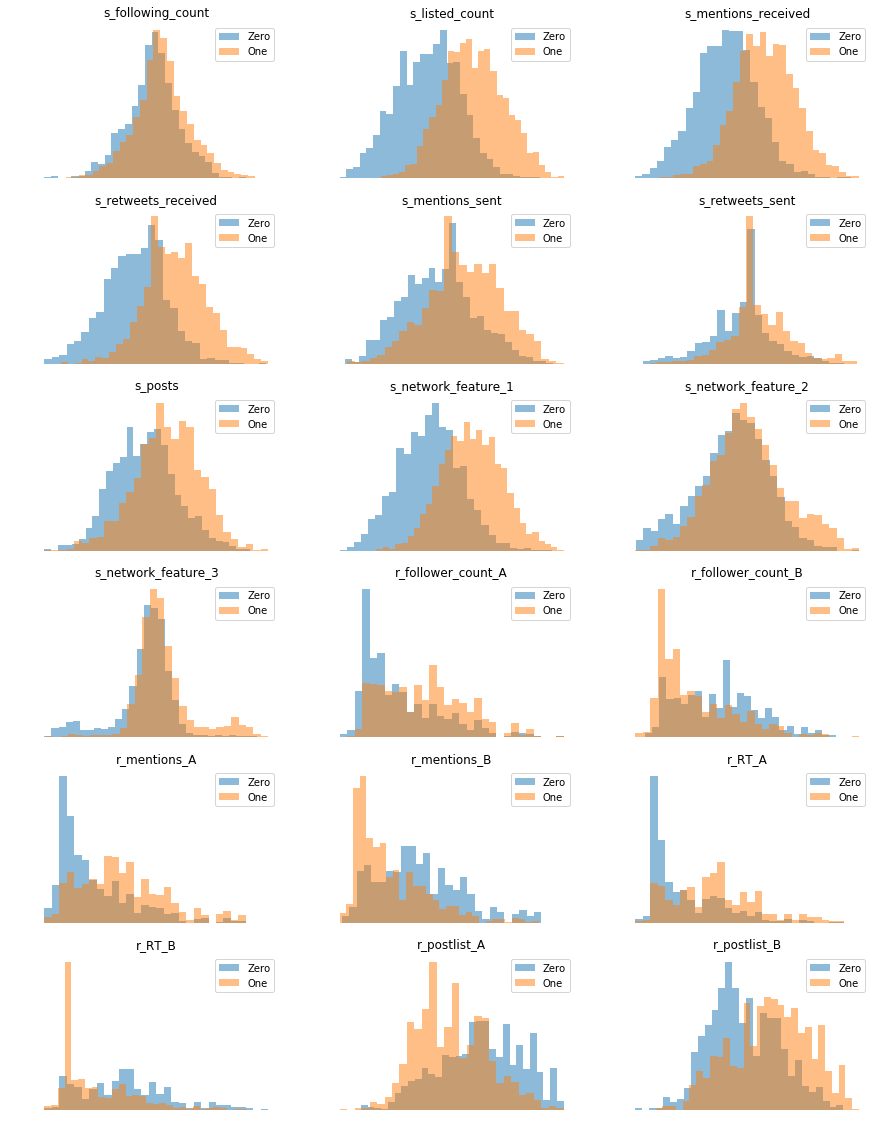

In [145]:
plot_histograms(train_data, features_names, y.values, cols = 3, figsize=(15,20), alpha=.5, bins=30)

<div style="direction:rtl; text-align:right">
يوضح الشكل أعلاه أن لدينا توزيعين مختلفين للأصناف المختلفة وهذا خبر جيد جداً.

<div style="direction:rtl; text-align:right">

# نمذجة البيانات

<div style="direction:rtl; text-align:right">
سنقوم الآن بنمذجة البيانات باستخدام عدة نماذج ونرى كيف يمكن أن نحسن من أداء النموذج. تحديدا، سنقوم بتدريب النموذج باستخدام البيانات  (training_data) ونرى أداء النموذج باستخدام عدد من المُدخلات. لنبدأ بالانحدار اللوجستي. في الخانة أدناه، قم باستيراد كلاً من مكتبة الانحدار اللوجستي، وأمر cross_val_score ثم استخدمهم في تدريب النموذج والتحقق من صحته.

In [151]:
############################
# عليك تعديل هذه الخانة قبل تسليم المشروع
# YOU HAVE TO EDIT THIS CELLL
############################

# HINT: You should use `train_data` as your input
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

model1 = LogisticRegression()
scores = cross_val_score(model1, train_data, y, cv=5)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

In [152]:
scores.mean()

0.7661862894101565

<div style="direction:rtl; text-align:right">
الآن سنكرر نفس العملية ولكن باستخدام قيمة أخرى للمُدخل C وهو يعبر عن مقدار الضبط (regularization)

In [156]:
############################
# عليك تعديل هذه الخانة قبل تسليم المشروع
# YOU HAVE TO EDIT THIS CELLL
############################

model2 = LogisticRegression(C=0.01)
scores = cross_val_score(model2, train_data, y, cv=5)
scores.mean()

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

0.7703664568017299

<div style="direction:rtl; text-align:right">
هل تلاحظ أي فرق في الدقة ؟

<div style="direction:rtl; text-align:right">
على الأغلب لاحظت أن هناك فرقاً طفيفاً في أداء النموذج باستخدام قيمة أخرى للمدخل. في الحقيقة كل قيمة ل C ستعطيك نتيجة مختلفة. فكيف نعرف القيمة الصحيحة التي يجب علينا استخدامها؟ سنقوم بالبحث عن هذه القيمة باستخدام  Grid Search.

<div style="direction:rtl; text-align:right">
في الخانة التالية، تجد قيم مختلفة ل C وقيم مختلفة ل fit_intercept. ما عليك الآن هو قراءة الأمر GridSearchCV ومن ثم استخدام القيم من الخانة التالية في البحث عن أفضل نموذج ممكن لتصنيف البيانات. ابدأ أولا بقراءة توثيق هذا الأمر:

- http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV

In [157]:
param_grid = {
 'C':[0.0001, 0.001, 0.01 , 0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 10., 100.],
 'fit_intercept': [True, False]
}

In [158]:
############################
# عليك تعديل هذه الخانة قبل تسليم المشروع
# YOU HAVE TO EDIT THIS CELLL
############################

from sklearn.model_selection import GridSearchCV

gsearch1 = GridSearchCV(model1, param_grid)


gsearch1.fit(train_data,y)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbf

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 0.9,
                               1.0, 10.0, 100.0],
                         'fit_intercept': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

<div style="direction:rtl; text-align:right">
بعد أن أنجزنا عملية البحث، سنقوم بطباعة أفضل "تشكيلة" من المدخلات والتي تملك أعلى درجة:

In [159]:
gsearch1.best_params_

{'C': 0.01, 'fit_intercept': True}

<div style="direction:rtl; text-align:right">
وهنا سنقوم بطباعة أفضل درجة توصل لها البحث باستخدام التشكيلة أعلاه:

In [160]:
gsearch1.best_score_

0.7707272727272727

<div style="direction:rtl; text-align:right">
عملية البحث عن نموذج عملية قد تأخذ وقتاً طويلاً جداً. فأعلاه، لدينا 22 نموذج مختلف (١١ ضرب ٢)، كل نموذچ يمر عبر التحقق المتقاطع ذو 5 أقسام بما معناه أننا نقوم بمطابقة النموذج 110 مرات! وهنا يأتي دور الإمكانيات المتقدمة في تسريع هذه العملية. بشكل عام، لا غنى عن أداء هذا البحث في أي نموذج معقد يتطلب العديد من المدخلات. لنكرر نفس الأمر أدناه ولكن مع نموذج الغابات العشوائية

In [161]:
############################
# عليك تعديل هذه الخانة قبل تسليم المشروع
# YOU HAVE TO EDIT THIS CELLL
############################

from sklearn.ensemble import RandomForestClassifier

param_grid = {
 'min_samples_split':[2,3,5],
 'min_samples_leaf':[2,3,5],
 'max_features': ['auto', 'log2', 'sqrt']
}
rfc = RandomForestClassifier()

gsearch2 = GridSearchCV(rfc, param_grid)


gsearch2.fit(train_data,y)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\ensemble

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: Future

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: Future

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
           

<div style="direction:rtl; text-align:right">
بعد أن أنجزنا عملية البحث، سنقوم بطباعة أفضل "تشكيلة" من المدخلات والتي تملك أعلى درجة:

In [162]:
gsearch2.best_params_

{'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 5}

<div style="direction:rtl; text-align:right">
وهنا سنقوم بطباعة أفضل درجة توصل لها البحث باستخدام التشكيلة أعلاه:

In [163]:
gsearch2.best_score_

0.7729090909090909

<div style="direction:rtl; text-align:right">

# تسليم المشروع

<div style="direction:rtl; text-align:right">
قبل تسليم المشروع في موقع كاقل، سوف نستخدم النموذج الأفضل من النماذج أعلاه لمطابقته على جميع البيانات.

In [164]:
model = LogisticRegression(**gsearch1.best_params_) # نلاحظ هنا طريقة استخدام المدخلات

In [165]:
model.fit(train_data, y) # training model on full data

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [166]:
test_data = pd.read_csv('predict-who-is-more-influential-in-a-social-network/test.csv')

In [167]:
test_data = get_process_features(test_data)

In [168]:
test_data = pd.DataFrame(scaler.transform(test_data.values), columns=test_data.columns)

In [169]:
test_data['Choice'] = model.predict(test_data)

In [170]:
test_data.index.name = 'Id'

In [171]:
test_data.index = test_data.index+1

In [172]:
test_data['Choice'].head()

Id
1    0
2    1
3    0
4    0
5    1
Name: Choice, dtype: int64

In [173]:
test_data['Choice'].to_csv('./social_media_analysis_submission.csv', header=True)

<div style="direction:rtl; text-align:right">
والآن اذهب إلى موقع كاقل وقم برفع هذا الملف لترى قوة النموذج:

- https://www.kaggle.com/c/predict-who-is-more-influential-in-a-social-network/submit

<div style="direction:rtl; text-align:right">
تسليم هذا المشروع على مرحلتين: الأولى هي في تسليم الملف إلى موقع كاقل ومن ثم مشاركة الرابط، والمرحلة الثانية هي باستكمال الخانات التي تحتاج إلى إكمال ومن ثم التأكد من سلامتها.